# pandas plots

https://realpython.com/pandas-plot-python/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None) # don't hide any columns

`.plot(kind=...)`  
`"area"` area plots  
`"bar"` vertical bar charts  
`"barh"` horizontal bar charts  
`"box"` box plots  
`"hexbin"` hexbin plots  
`"hist"` histograms  
`"kde"` kernel density estimate charts  
`"density"` alias for "kde"  
`"line"` line graphs (default)  
`"pie"` pie charts  
`"scatter"` scatter plots

or use `plot().area()` etc.

## iris

In [17]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris['species_col'] = iris['species'].map({
    'setosa': 'red', 
    'versicolor': 'blue', 
    'virginica': 'green'
})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_col
0,5.1,3.5,1.4,0.2,setosa,red
1,4.9,3.0,1.4,0.2,setosa,red
2,4.7,3.2,1.3,0.2,setosa,red
3,4.6,3.1,1.5,0.2,setosa,red
4,5.0,3.6,1.4,0.2,setosa,red


<Axes: title={'center': 'sepal_length'}, ylabel='Frequency'>

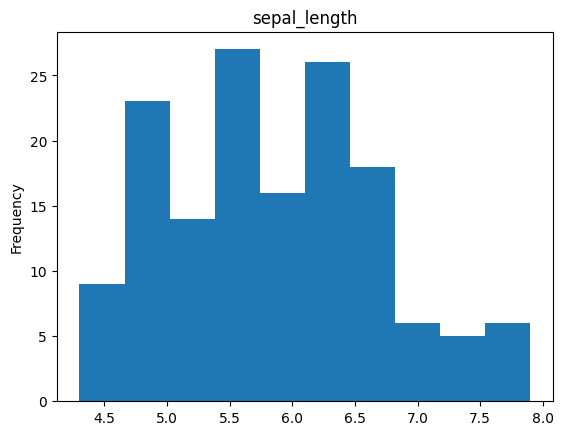

In [7]:
iris['sepal_length'].plot(kind = 'hist', title='sepal_length')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

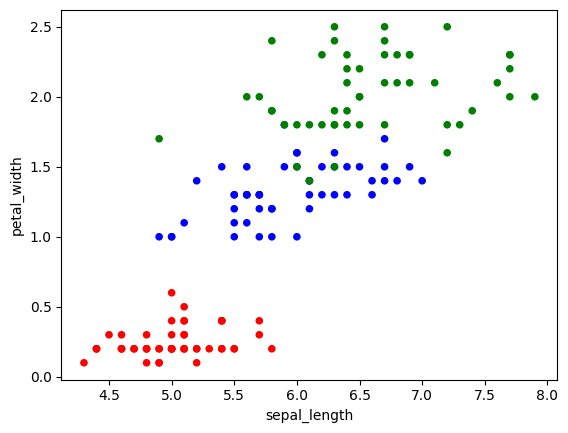

In [20]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'petal_width', c='species_col')

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

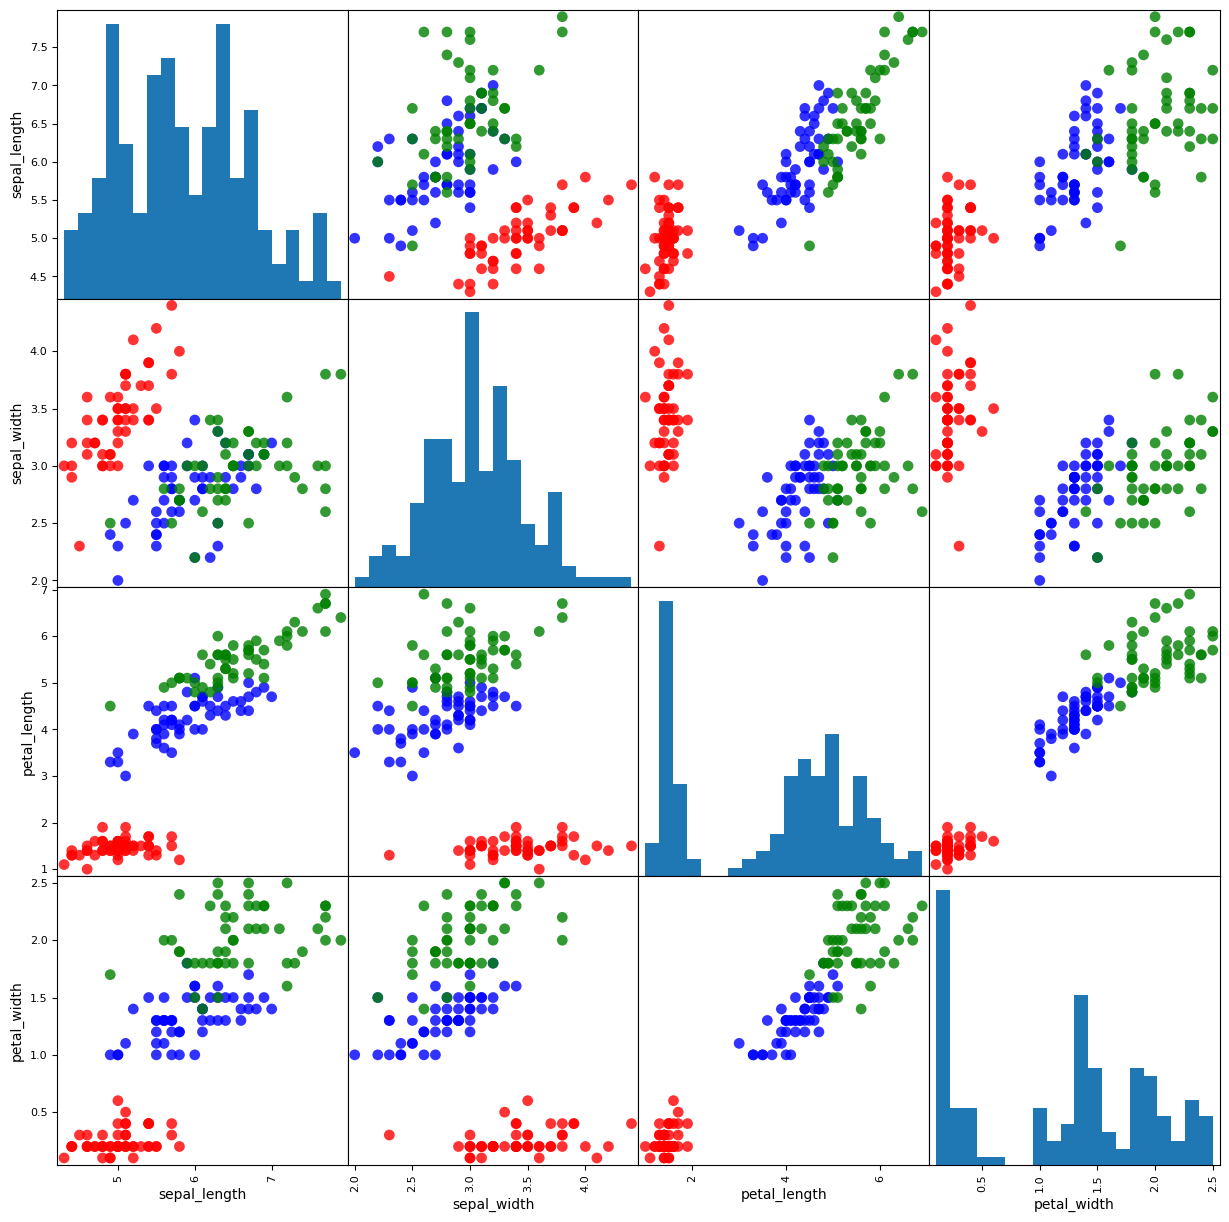

In [19]:
pd.plotting.scatter_matrix(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    c=iris['species_col'],
    figsize=(15, 15), 
    marker='o',
    hist_kwds={'bins': 20}, 
    s=60, 
    alpha=.8
)

## recent-grads

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

In [6]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<Axes: xlabel='Rank'>

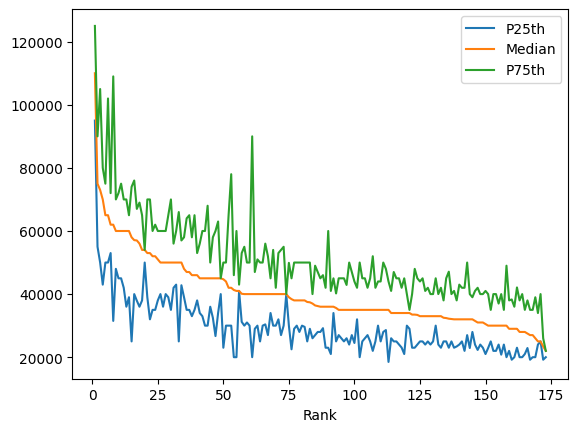

In [7]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

`.plot()` is just a a wrapper for `pyplot.plot()`

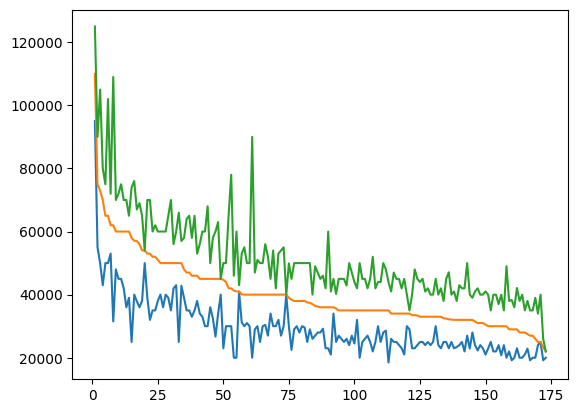

In [9]:
plt.plot(df["Rank"], df[["P25th", "Median", "P75th"]])

<Axes: title={'center': 'asdf'}, ylabel='Major'>

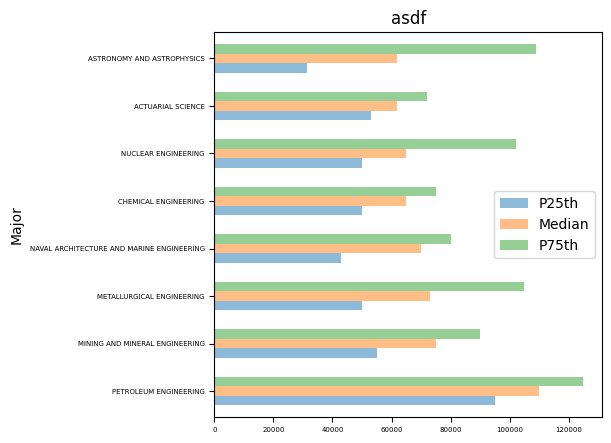

In [35]:
df\
    .loc[df["Median"] > 60000, ['Major', "P25th", "Median", "P75th"]]\
    .set_index('Major')\
    .plot(
        kind='barh', 
        width=0.6, # bar width
        fontsize=5,
        figsize=(5, 5),
        title='asdf',
        alpha=0.5,
    )